In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import numpy as np

In [2]:
data = '/home/sam/prog/api_stocks_get/data.csv'

In [3]:
df = pd.read_csv(data, delimiter=',')

In [4]:
df

,timestamp,open,high,low,close,volume
0,2023-11-30 19:55:00,158.3500,158.5500,158.3100,158.3100,105
1,2023-11-30 19:45:00,158.5500,158.5500,158.5500,158.5500,40
2,2023-11-30 19:40:00,158.3000,158.3000,158.3000,158.3000,1
3,2023-11-30 19:35:00,158.4500,158.5100,158.3000,158.3000,165
4,2023-11-30 19:30:00,158.4900,158.4900,158.4400,158.4900,115
...,...,...,...,...,...,...
15370,2023-07-03 04:45:00,130.8230,130.8860,130.7830,130.8570,40
15371,2023-07-03 04:30:00,130.7940,130.7980,130.7140,130.7300,28
15372,2023-07-03 04:10:00,130.8230,130.8270,130.7830,130.7980,1
15373,2023-07-03 04:05:00,130.7540,131.0030,130.6850,130.7980,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15375 entries, 0 to 15374
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  15375 non-null  object
 1   open       15375 non-null  object
 2   high       15375 non-null  object
 3   low        15375 non-null  object
 4   close      15375 non-null  object
 5   volume     15375 non-null  object
dtypes: object(6)
memory usage: 720.8+ KB


In [6]:
Y_close = df['close']
Y_open = df['open']
X = df['timestamp']

In [7]:
%matplotlib inline

In [8]:
Y_test_graph_open = Y_open[::150].to_numpy()[::-1]
Y_test_graph_close = Y_close[::150].to_numpy()[::-1]

In [9]:
X_test_graph = X[::150].to_numpy()[::-1]

In [10]:
y_open_float = np.array(list(map(float, Y_test_graph_open)))
y_close_float = np.array(list(map(float, Y_test_graph_close)))

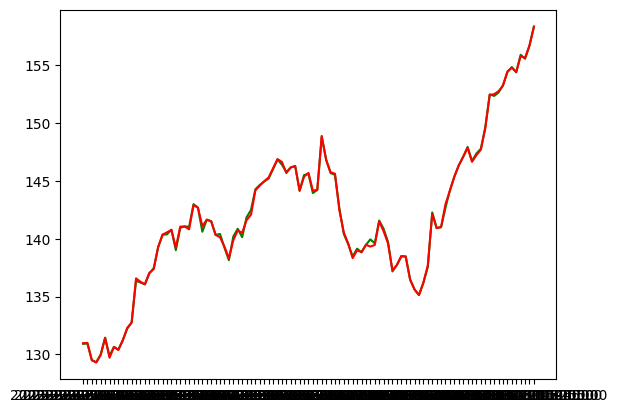

In [11]:
plt.plot(X_test_graph, y_open_float, color='green')
plt.plot(X_test_graph, y_close_float, color='red')
plt.savefig('foo.png')

In [60]:
plt.savefig('foo.png')

<Figure size 640x480 with 0 Axes>

In [63]:
X_test_graph

array(['2023-07-31 19:55:00', '2023-07-31 05:10:00',
       '2023-07-28 06:25:00', '2023-07-27 08:00:00',
       '2023-07-26 09:25:00', '2023-07-25 10:10:00',
       '2023-07-24 10:05:00', '2023-07-21 09:55:00',
       '2023-07-20 10:20:00', '2023-07-19 12:25:00',
       '2023-07-18 13:50:00', '2023-07-17 13:35:00',
       '2023-07-14 14:40:00', '2023-07-13 15:15:00',
       '2023-07-12 16:00:00', '2023-07-11 16:10:00',
       '2023-07-10 15:35:00', '2023-07-07 14:35:00',
       '2023-07-06 14:00:00', '2023-07-05 13:05:00',
       '2023-07-03 10:05:00', '2023-08-31 09:05:00',
       '2023-08-30 08:30:00', '2023-08-29 06:15:00',
       '2023-08-25 19:20:00', '2023-08-24 17:20:00',
       '2023-08-23 17:15:00', '2023-08-22 16:30:00',
       '2023-08-21 15:50:00', '2023-08-18 15:50:00',
       '2023-08-17 15:45:00', '2023-08-16 14:45:00',
       '2023-08-15 13:40:00', '2023-08-14 13:30:00',
       '2023-08-11 12:30:00', '2023-08-10 12:05:00',
       '2023-08-09 11:40:00', '2023-08-08 12:3

# обучаем RNN


In [3]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Загрузка данных из CSV
data = pd.read_csv('/home/sam/prog/api_stocks_get/data.csv')
data

,timestamp,open,high,low,close,volume
0,2023-11-30 19:55:00,158.350,158.550,158.310,158.310,105
1,2023-11-30 19:45:00,158.550,158.550,158.550,158.550,40
2,2023-11-30 19:40:00,158.300,158.300,158.300,158.300,1
3,2023-11-30 19:35:00,158.450,158.510,158.300,158.300,165
4,2023-11-30 19:30:00,158.490,158.490,158.440,158.490,115
...,...,...,...,...,...,...
15366,2023-07-03 04:45:00,130.823,130.886,130.783,130.857,40
15367,2023-07-03 04:30:00,130.794,130.798,130.714,130.730,28
15368,2023-07-03 04:10:00,130.823,130.827,130.783,130.798,1
15369,2023-07-03 04:05:00,130.754,131.003,130.685,130.798,121


In [9]:
data['close'] = data['close'].astype(float)
data['open'] = data['open'].astype(float)
data['high'] = data['high'].astype(float)
data['low'] = data['low'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15371 entries, 0 to 15370
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  15371 non-null  object 
 1   open       15371 non-null  float64
 2   high       15371 non-null  float64
 3   low        15371 non-null  float64
 4   close      15371 non-null  float64
 5   volume     15371 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 720.6+ KB


In [42]:

# # Преобразование данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['open', 'high', 'low', 'close', 'volume']])
# scaled_data = data[['open', 'high', 'low', 'close', 'volume']]


In [43]:
scaled_data

array([[9.92761394e-01, 9.93976105e-01, 9.91989747e-01, 9.91795398e-01,
        2.02361126e-05],
       [9.99463807e-01, 9.93976105e-01, 9.99679590e-01, 9.99487212e-01,
        7.58854224e-06],
       [9.91085791e-01, 9.85609585e-01, 9.91669337e-01, 9.91474905e-01,
        0.00000000e+00],
       ...,
       [7.02747989e-02, 6.61959104e-02, 1.09996796e-01, 1.10057048e-01,
        0.00000000e+00],
       [6.79624665e-02, 7.20859409e-02, 1.06856777e-01, 1.10057048e-01,
        2.33493607e-05],
       [7.12466488e-02, 7.20859409e-02, 1.07785966e-01, 1.07877700e-01,
        9.72890030e-06]])

In [44]:
# Функция для создания временных последовательностей
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        sequences.append(sequence)
    return np.array(sequences)


In [45]:

# Параметры модели
SEQ_LENGTH = 100  # Длина последовательности
PREDICT_STEPS = 1  # Шаг для предсказания

# Создание временных последовательностей
sequences = create_sequences(scaled_data, SEQ_LENGTH + PREDICT_STEPS)

In [46]:
len(sequences[0]) 

101

101 число это 100 значений и 1 это предсказание

In [47]:
# Разделение на обучающую и валидационную выборки
X = sequences[:, :-PREDICT_STEPS]
y = sequences[:, -PREDICT_STEPS:]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

In [79]:
X_train.size()

torch.Size([12216, 100, 5])

In [48]:

# Преобразование данных в тензоры PyTorch
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).float()

In [49]:
print(X_train.size())
print(y_train.size())

print(X_val.size())
print(y_val.size())


y_train = y_train.squeeze(1)
y_val = y_val.squeeze(1)

print(y_train.size())
print(y_val.size())

torch.Size([12216, 100, 5])
torch.Size([12216, 1, 5])
torch.Size([3054, 100, 5])
torch.Size([3054, 1, 5])
torch.Size([12216, 5])
torch.Size([3054, 5])


In [50]:
# Создание класса модели RNN
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [51]:
# Инициализация модели
input_size = 5  # Количество признаков во входных данных (open, high, low, close, volume)
hidden_size = 100
# output_size = PREDICT_STEPS
model = SimpleRNN(input_size, hidden_size, 5)

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [52]:
# Обучение модели
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

Epoch [1/10], Loss: 0.260360985994339
Epoch [2/10], Loss: 0.21251022815704346
Epoch [3/10], Loss: 0.1717655509710312
Epoch [4/10], Loss: 0.1351388394832611
Epoch [5/10], Loss: 0.10092079639434814
Epoch [6/10], Loss: 0.06870399415493011
Epoch [7/10], Loss: 0.0398569256067276
Epoch [8/10], Loss: 0.018466763198375702
Epoch [9/10], Loss: 0.012056921608746052
Epoch [10/10], Loss: 0.02408985234797001


In [95]:
def inverse_transform(scaled_data, scaler):

    return scaler.inverse_transform(scaled_data)
    
# Валидация модели
model.eval()
with torch.no_grad():
    predictions = model(X_val)
    val_loss = criterion(predictions, y_val)
    

    original_predictions = inverse_transform(predictions.detach().numpy(), scaler)
    true_stocks = inverse_transform(predictions.detach().numpy(), scaler)

    print('model prediction:', predictions)
    print('true values:', y_val)
    
    print(f'Validation Loss: {val_loss.item()}')
    print('______________________')
    print('original prediction:', original_predictions)

# Прогнозирование
# Для прогнозирования на новых данных нужно подготовить последовательность данных и использовать model.forward()


model prediction: tensor([[ 0.7164,  0.6067,  0.6359,  0.6588, -0.0318],
        [ 0.7166,  0.6066,  0.6359,  0.6585, -0.0319],
        [ 0.7169,  0.6065,  0.6359,  0.6588, -0.0318],
        ...,
        [ 0.5656,  0.4559,  0.4998,  0.5186, -0.0408],
        [ 0.5657,  0.4555,  0.4995,  0.5185, -0.0409],
        [ 0.5657,  0.4558,  0.4998,  0.5186, -0.0409]])
true values: tensor([[3.9832e-01, 3.9406e-01, 4.1746e-01, 4.2295e-01, 9.7289e-06],
        [3.9899e-01, 3.9470e-01, 4.1996e-01, 4.2013e-01, 6.0319e-06],
        [3.9735e-01, 3.9309e-01, 4.2310e-01, 4.2327e-01, 1.1675e-06],
        ...,
        [6.9303e-02, 6.5225e-02, 1.0779e-01, 1.0788e-01, 5.2536e-06],
        [7.0275e-02, 6.6196e-02, 1.1000e-01, 1.1006e-01, 0.0000e+00],
        [6.7962e-02, 7.2086e-02, 1.0686e-01, 1.1006e-01, 2.3349e-05]])
Validation Loss: 0.11689742654561996
______________________
original prediction: [[ 1.5010397e+02  1.4697783e+02  1.4719583e+02  1.4791977e+02
  -1.6332319e+05]
 [ 1.5010953e+02  1.4697353e+0

In [90]:
predictions.size()

torch.Size([3054, 5])

In [91]:
y_val.size()

torch.Size([3054, 5])

# Построим графики закрытия цены по модели и по жизни

In [96]:
predictions_to_graph = inverse_transform(predictions.detach().numpy(), scaler)
predictions_to_graph

array([[ 1.5010397e+02,  1.4697783e+02,  1.4719583e+02,  1.4791977e+02,
        -1.6332319e+05],
       [ 1.5010953e+02,  1.4697353e+02,  1.4719739e+02,  1.4791153e+02,
        -1.6392456e+05],
       [ 1.5011723e+02,  1.4697227e+02,  1.4719582e+02,  1.4791937e+02,
        -1.6355394e+05],
       ...,
       [ 1.4560266e+02,  1.4247165e+02,  1.4294777e+02,  1.4354568e+02,
        -2.0957611e+05],
       [ 1.4560593e+02,  1.4245898e+02,  1.4294058e+02,  1.4354091e+02,
        -2.1038633e+05],
       [ 1.4560573e+02,  1.4246782e+02,  1.4294791e+02,  1.4354570e+02,
        -2.1017461e+05]], dtype=float32)

In [98]:
y_val_to_graph = inverse_transform(y_val.detach().numpy(), scaler)
y_val_to_graph

array([[140.612    , 140.624    , 140.379    , 140.56099  ,  51.       ],
       [140.632    , 140.643    , 140.457    , 140.473    ,  32.       ],
       [140.583    , 140.595    , 140.555    , 140.571    ,   6.9999995],
       ...,
       [130.79399  , 130.79799  , 130.714    , 130.73     ,  28.       ],
       [130.823    , 130.82701  , 130.783    , 130.79799  ,   1.       ],
       [130.754    , 131.003    , 130.685    , 130.79799  , 121.       ]],
      dtype=float32)

In [99]:
predictions_close = [stocks[-2] for stocks in predictions_to_graph]
predictions_close

[147.91977,
 146.12926,
 146.11888,
 ...]

In [104]:
y_val_close = [stocks[-2] for stocks in y_val_to_graph]
len(y_val_close)

3054

In [103]:
time = np.array([i for i in range(3054)])

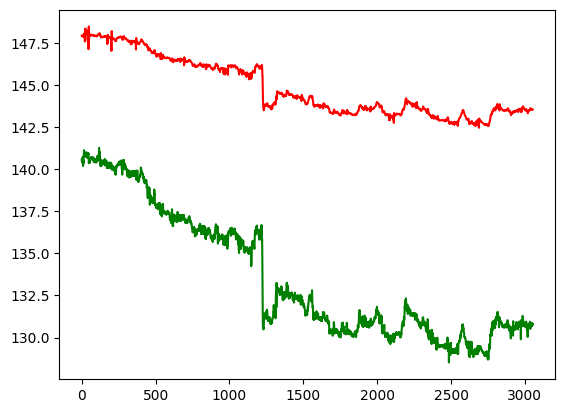

In [106]:
plt.plot(time, y_val_close, color='green') # true
plt.plot(time, predictions_close, color='red') # model
plt.show()



# Валидация на одном примере

In [81]:
pred = model.forward(X_val)
inverse_transform(pred.detach().numpy(), scaler)
X_val.size()
X_test = (X_val[0].unsqueeze(0))
X_test.size()
pred_test = model.forward(X_test)
pred_test
stocks_101 = inverse_transform(pred_test.detach().numpy(), scaler)
stocks_101.tolist()  #['open', 'high', 'low', 'close', 'volume']

# '''


#     open: 150.10
#     high: 146.97
#     low: 147.19
#     close: 147.91
#     volume ...


# '''


'\n\n\n    open: 150.10\n    high: 146.97\n    low: 147.19\n    close: 147.91\n    volume ...\n\n\n'